## 1. Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## 2. Load Dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Basic Exploration

In [10]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  4. Data Cleaning

* droping unimportant columns 

In [13]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

*  Fill Missing Values

In [16]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\amiro\AppData\Local\Temp\ipykernel_1492\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\amiro\AppData\Local\Temp\ipykernel_1492\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

* Encode Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])        # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])  # S=2, C=0, Q=1

## 5. Exploratory Data Analysis (EDA)

*  Survival Rate by Gender

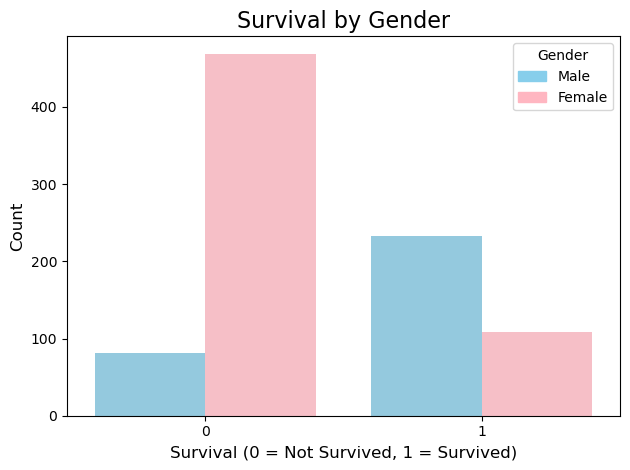

In [50]:

sns.countplot(x='Survived', hue='Sex', data=df, palette={0: 'skyblue', 1: 'lightpink'})
plt.title("Survival by Gender", fontsize=16)
plt.xlabel("Survival (0 = Not Survived, 1 = Survived)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Creating Legend manually
male_patch = mpatches.Patch(color='skyblue', label='Male')
female_patch = mpatches.Patch(color='lightpink', label='Female')
plt.legend(handles=[male_patch, female_patch], title='Gender')

plt.tight_layout()
plt.show()

* Age Distribution by Survival

Text(0.5, 1.0, 'Age vs Survival')

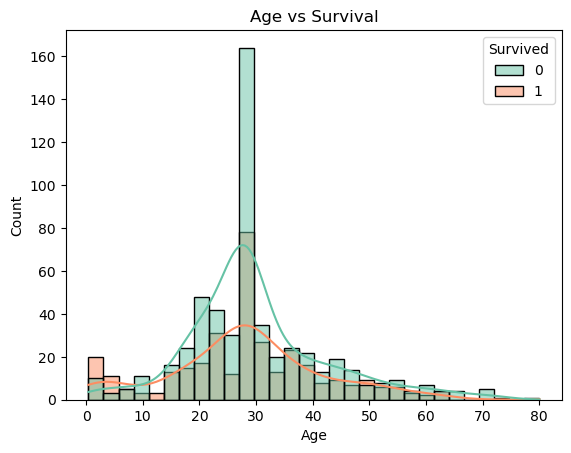

In [53]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2')
plt.title("Age vs Survival")

* Fare Distribution

Text(0.5, 1.0, 'Fare Paid vs Survival')

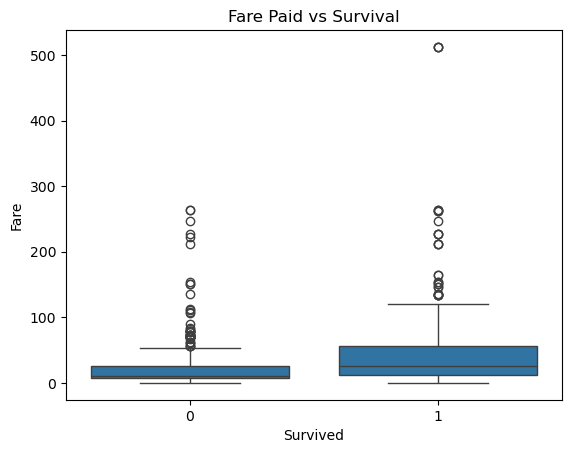

In [56]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Paid vs Survival")

*  Survival by Class

Text(0.5, 1.0, 'Survival by Passenger Class')

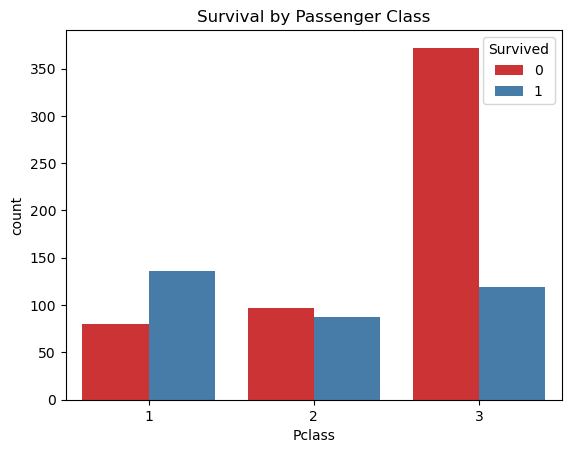

In [59]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Passenger Class")

## 6. Correlation Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

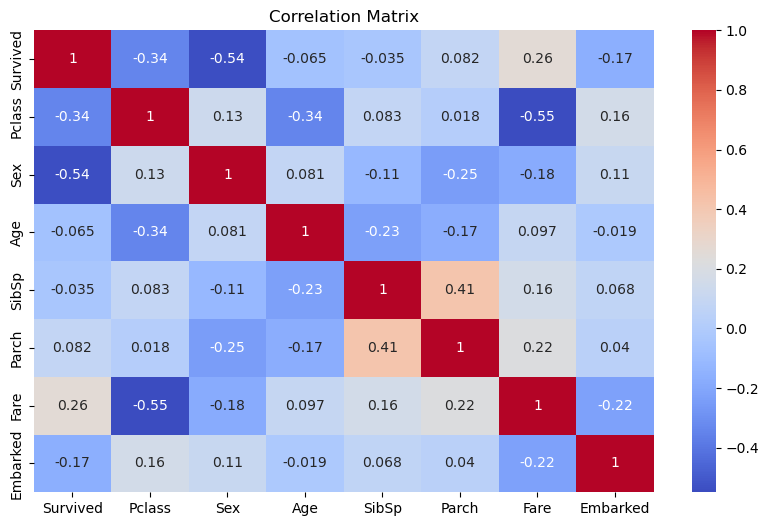

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

* Females survived more than males 💡

* Higher fare or first class → higher survival 🔥

* Age and class play an important role too